In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from konlpy.tag import Hannanum
from konlpy.tag import Okt
from konlpy.tag import Komoran
import sqlite3 as sq3
from pandas.io import sql
import os
import numpy as np
import math

## read db file

In [2]:
# 데이터베이스 저장
def db_save(data, db_name, table_name):
    with sq3.connect(os.path.join('.',db_name)) as con: # sqlite DB 파일이 존재하지 않는 경우 파일생성
        try:
            data.to_sql(name = table_name, con = con, index = False, if_exists='replace') 
            #if_exists : {'fail', 'replace', 'append'} default : fail
        except Exception as e:
            print(str(e))
        print(len(data), '건 저장완료..')

In [3]:
# 데이터베이스 불러오기
def db_select(db_name, table_name):
    with sq3.connect(db_name) as con: 
        try:
            query = 'SELECT * FROM {}'.format(table_name)
            df = pd.read_sql(query, con = con)
        except Exception as e:
            print(str(e)) 
        return df  

In [4]:
def word_tokens(string):

    tokens_const = []

    for i in string.split(','):
        tokens_const.append(i)

    # 단어별 빈도를 담을 딕셔너리 생성하고, 빈도 계산
    const_word_count = dict()
    for word in tokens_const:
        const_word_count[word] = const_word_count.get(word, 0) + 1

    # 빈도를 key로 하여 단어를 빈도 역순으로 정렬
    sorted_word_count = sorted(const_word_count, key=const_word_count.get, reverse=True)

    n = sorted_word_count[:] # 빈도수 단어를 추출
    w = [const_word_count[key] for key in n] # 단어에 대한 빈도

    full_list = []

    for i in n,w:
        full_list.append(i)

    return full_list

# save word tokens into a file

In [5]:
DB_NAME = '법무법인_태평양_법률자료.db'
TABLE_NAME = '태평양_tokenized'
df = db_select(DB_NAME,TABLE_NAME)

In [6]:
temp_df = df.copy()

strings_t = []
strings_c = []

for i in temp_df.iloc[:,4]:
    string_token = ""
    string_count = ""
    
    token_set = word_tokens(i)
    string_token = ",".join(token_set[0])
    
    n = map(str,token_set[1])
    n = list(n)
    string_count = ",".join(n)

    strings_t.append(string_token)
    strings_c.append(string_count)
    
temp_df['tokens'] = strings_t
temp_df['counts'] = strings_c

temp_df.iloc[:,[0,5,6]]

,제목,tokens,counts
0,한국-인도네시아 포괄적 경제동반자협정(CEPA) 비준,"한인니,인도네시아,절차,국회,원산지,비준,서비스,법률,발효,도입,승인,외국,투자자,...","58,52,26,25,22,20,16,14,13,13,12,11,11,11,10,1..."
1,지역주택조합이 조합총회 결의 없이 체결한 계약의 효력에 관한 대법원판결(대법원 20...,"계약,지역주택조합,주택법,체결,총회,효력,조합원,부담,사정,시행규칙,원칙적,절차적,...","44,31,25,23,22,20,15,15,14,13,12,12,12,12,12,1..."
2,금융투자업자 간 업무용으로 지정되지 않은 정보통신수단을 사용하여 이루어진 매매 교섭...,"원고들,정보통신수단,사건,지정,성립,금융투자업자,지급거절,분쟁,금융회사,임직원들,지...","18,15,15,13,10,9,9,9,8,8,8,8,8,8,7,7,7,6,6,6,6..."
3,도심복합사업 개편 – 정부의 국민 주거안정 실현방안 발표 및 ‘도심 복합개발 지원에...,"민간,지정,완화,성장거점형,주거중심형,토지주,용적률,규제,도심복합사업,추진,사업시행...","20,20,18,16,16,14,14,14,12,12,12,10,10,10,10,8..."
4,2022년도 지방세입 관계법률 개정안 주요 사항,"개정안,감면,취득세,세율,납세의무,과세표준,지방세,종전,성립,국세,제고,심판청구,간...","34,28,20,17,16,16,14,14,14,12,12,12,12,11,9,9,..."
...,...,...,...
357,가맹사업법 시행령 개정안과 관련하여 알려드립니다.,"개정안,가맹사업법,시행령,개정,가맹본부,매출액,점포환경,위반행위,과태료,기준,위반,...","59,43,37,31,27,21,17,17,16,15,15,14,13,12,12,1..."
358,부당지원행위 등 공정거래법 시행령 개정 및 부당특약 등 하도급법 시행령 개정과 관련...,"개정,시행령,행위,거래,공정거래법,부당지원행위,조건,특수관계인,유리한,회사,경우,하...","97,81,51,49,45,36,34,31,30,29,26,24,19,18,18,1..."
359,환경오염물질 배출시설 관리체계 전면 개편,"환통법,배출시설,기존,입법예고안,규제,기업,기준,허가,인허가,통합허가,환경부,부담,...","62,41,35,35,26,26,25,25,19,19,18,17,15,14,14,1..."
360,상해자유무역구 부가가치통신업무 개방,"개방,시범구,강화,외자기업,국내,외자지분비율,인터넷,진일보,추진,시범적,초과,서비스...","69,61,37,36,36,33,30,25,24,24,23,23,20,20,19,1..."


In [7]:
db_save(temp_df, DB_NAME, '태평양_token2')
#db_save_as_csv(temp_df)

362 건 저장완료..


In [8]:
df.iloc[4,3]

'행정안전부는 2022 8 11 지방세발전위원회를 개최하여 경제 활력 제고와 민생안정 지원을 위한2022년 지방세입 관계법률 개정안을 발표하였습니다 이와 관련하여 납세자의 입장에서 도움이 될 만한 주요 내용을 요약하여 소개해드리겠습니다 행정안전부는 2022 8 11 지방세발전위원회를 개최하여 경제 활력 제고와 민생안정 지원을 위한2022년 지방세입 관계법률 개정안을 발표하였습니다 이와 관련하여 납세자의 입장에서 도움이 될 만한 주요 내용을 요약하여 소개해드리겠습니다 행정안전부가 발표한 이번 개정안은 제도개선 토론회 지방세발전위원회 지방세 감면 통합심사 등을 거쳐 마련되었으며 지난 2022 7 21 기획재정부가 발표한 2022년 국세 개정안 내용 일부가 연계 반영되어 있습니다 개정안은 2022 8 12부터 2022 9 1까지 20일간의 입법예고기간을 거쳐 2022 9 22 차관회의 및 2022 9 27 국무회의에 상정되어 2022 9월 말경 국회에 제출될 예정이며 국회 논의 과정에서 일부 변경이 이루어질 수 있습니다 국회는 통상 12월 본회의 의결로 지방세입 관계법률 개정사항을 최종 확정하는바 개정법은 대부분 2023 1 1부터 시행될 것으로 예상됩니다 행정안전부가 발표한 이번 개정안은 제도개선 토론회 지방세발전위원회 지방세 감면 통합심사 등을 거쳐 마련되었으며 지난 2022 7 21 기획재정부가 발표한 2022년 국세 개정안 내용 일부가 연계 반영되어 있습니다 개정안은 2022 8 12부터 2022 9 1까지 20일간의 입법예고기간을 거쳐 2022 9 22 차관회의 및 2022 9 27 국무회의에 상정되어 2022 9월 말경 국회에 제출될 예정이며 국회 논의 과정에서 일부 변경이 이루어질 수 있습니다 국회는 통상 12월 본회의 의결로 지방세입 관계법률 개정사항을 최종 확정하는바 개정법은 대부분 2023 1 1부터 시행될 것으로 예상됩니다 지방세기본법 지방세기본법 지방세기본법 1 재산의 사실상 취득자에 대한 부과제척기간 특례 신설지방세기본법 제38조 제3항 1 

In [9]:
df1 = db_select(DB_NAME, '태평양_token2')
df1 = df1.iloc[:,[0,4]].copy()
df1

,제목,BoW
0,한국-인도네시아 포괄적 경제동반자협정(CEPA) 비준,"인도네시아,국회,한인니,비준,진행,상황,인도네시아,국회,한인니,비준,진행,상황,인도..."
1,지역주택조합이 조합총회 결의 없이 체결한 계약의 효력에 관한 대법원판결(대법원 20...,"주택법,시행규칙,지역주택조합,예산,조합원,부담,계약,체결,총회,의결,주택법,시행규칙..."
2,금융투자업자 간 업무용으로 지정되지 않은 정보통신수단을 사용하여 이루어진 매매 교섭...,"금융투자업자,주문기록,유지의무,정보통신수단,지정,금융투자업자,주문기록,유지의무,정보..."
3,도심복합사업 개편 – 정부의 국민 주거안정 실현방안 발표 및 ‘도심 복합개발 지원에...,"정부,국회,주택,공급,공공주택,특별법,개정,공공주택,복합사업,도입,사업,공공,주도적..."
4,2022년도 지방세입 관계법률 개정안 주요 사항,"행정안전부,지방세발전위원회,개최,경제,활력,민생안정,지원,지방세입,관계법률,개정안,..."
...,...,...
357,가맹사업법 시행령 개정안과 관련하여 알려드립니다.,"가맹사업법,시행령,개정안,가맹사업법,시행령,개정안,가맹사업법,시행령,개정안,가맹사업..."
358,부당지원행위 등 공정거래법 시행령 개정 및 부당특약 등 하도급법 시행령 개정과 관련...,"부당지원행위,공정거래법,시행령,개정,부당지원행위,공정거래법,시행령,개정,부당지원행위..."
359,환경오염물질 배출시설 관리체계 전면 개편,"환경오염물질,배출시설,관리체계,전면,개편,환경오염물질,배출시설,관리체계,전면,개편,..."
360,상해자유무역구 부가가치통신업무 개방,"상해자유무역구,개방,상해자유무역구,개방,상해자유무역구,개방,상해자유무역구,개방,중국..."


# 단어의 총 등장 횟수 구하기 --> TF

In [10]:
total_t = dict()

for i in df1.iloc[:,1]:
    tokens_const = []
    
    for j in i.split(','):
        tokens_const.append(j)
    
    for each_t in tokens_const:
        if each_t in total_t.keys():
            total_t[each_t] += 1
        else :
            total_t[each_t] = 1

In [11]:
total_t_list = sorted(total_t.items(), key=lambda x:x[1], reverse=True)
TF = dict(total_t_list)
TF

{'중국': 3671,
 '개정': 2723,
 '기업': 2307,
 '행위': 2179,
 '조치': 1862,
 '시행': 1852,
 '계약': 1839,
 '개인정보': 1749,
 '데이터': 1667,
 '기준': 1610,
 '이행': 1570,
 '정보': 1559,
 '회사': 1548,
 '법률': 1443,
 '의무': 1440,
 '경우': 1376,
 '사업자': 1358,
 '위반': 1339,
 '사용': 1329,
 '기존': 1315,
 '강화': 1282,
 '판결': 1281,
 '인정': 1229,
 '보호': 1221,
 '정부': 1218,
 '진행': 1198,
 '절차': 1135,
 '사건': 1086,
 '방식': 1054,
 '과징금': 1030,
 '외국': 1018,
 '상황': 1016,
 '지급': 1014,
 '당사자': 1006,
 '시행령': 994,
 '처리': 989,
 '법원': 977,
 '규제': 970,
 '목적': 956,
 '변경': 953,
 '사업': 946,
 '부과': 942,
 '요구': 934,
 '제한': 925,
 '이전': 912,
 '개정안': 907,
 '조사': 905,
 '요건': 889,
 '법령': 879,
 '권리': 865,
 '부담': 856,
 '도입': 852,
 '점검': 835,
 '개인': 832,
 '기간': 822,
 '체결': 821,
 '관리': 817,
 '침해': 817,
 '설립': 800,
 '금지': 798,
 '근로자': 773,
 '관계': 766,
 '제정': 757,
 '가능성': 754,
 '서비스': 753,
 '신청': 751,
 '거래': 728,
 '청구': 720,
 '대응': 720,
 '가능': 715,
 '경내': 715,
 '사유': 707,
 '대법원': 704,
 '조항': 701,
 '지원': 693,
 '위안': 680,
 '결과': 679,
 '제출': 674,
 '이용': 672,
 '운영':

## 특정 단어를 포함하는 문서빈도 수 계산 - DF

In [12]:
wordUsage = dict()     # IDF

for key in TF:
    exis = 0
    for eachRow in df1.iloc[:,1]:
        tokens_const = []
        
        for j in eachRow.split(','):
            tokens_const.append(j)

        if (str(key) in tokens_const):
            exis += 1
            
    wordUsage[key] = exis

In [13]:
wordUsage_list = sorted(wordUsage.items(), key=lambda x:x[1], reverse=True)
DF = dict(wordUsage_list)
DF

{'시행': 219,
 '기업': 190,
 '기준': 187,
 '법률': 182,
 '기존': 182,
 '인정': 171,
 '상황': 162,
 '개정': 161,
 '위반': 161,
 '사용': 161,
 '진행': 161,
 '강화': 157,
 '조치': 155,
 '요구': 155,
 '절차': 150,
 '행위': 149,
 '가능': 149,
 '기간': 144,
 '정부': 142,
 '의무': 140,
 '가능성': 140,
 '보호': 138,
 '이행': 137,
 '방식': 137,
 '목적': 131,
 '변경': 131,
 '운영': 131,
 '부담': 130,
 '요건': 127,
 '제한': 126,
 '결과': 125,
 '근거': 125,
 '한편': 125,
 '중국': 124,
 '정보': 124,
 '부과': 124,
 '의미': 124,
 '과정': 123,
 '계약': 122,
 '대응': 121,
 '제출': 121,
 '시사점': 119,
 '규제': 118,
 '회사': 117,
 '이유': 117,
 '도입': 115,
 '제외': 114,
 '검토': 114,
 '관리': 111,
 '사업': 110,
 '체결': 110,
 '수행': 110,
 '제정': 109,
 '제기': 108,
 '기업들': 108,
 '금지': 107,
 '신청': 107,
 '판결': 106,
 '서비스': 103,
 '사유': 103,
 '제시': 103,
 '지급': 102,
 '방법': 102,
 '유의': 102,
 '추가': 101,
 '제도': 101,
 '부분': 101,
 '사전': 100,
 '조항': 99,
 '이용': 99,
 '처리': 98,
 '사건': 97,
 '권리': 97,
 '활용': 97,
 '법원': 95,
 '원칙': 95,
 '보유': 94,
 '신설': 93,
 '방안': 93,
 '존재': 93,
 '별도': 93,
 '지원': 92,
 '조사': 91,
 '분쟁': 91,
 '명확

# TF-IDF
##### 참고: https://brunch.co.kr/@bflysoft1117/127, https://www.researchgate.net/publication/342833072_gujojeog_topig_modelling-eul_hwal-yonghan_gong-gongdeiteo_suyo_bunseog_Analysis_of_Open_Government_Data_Demand_Using_Structural_Topic_Modeling
높을수록 단어 중요도가 높다
### TF-IDF = TF X log(N/DF)
- TF: 문서 내 특정 단어의 빈도 수
- N: 분석 대상 문서 통합
- DF: 특정 단어를 포함하는 문서빈도 수

In [14]:
TF_IDF = dict()     # dictionary to save TF-IDF values

N = len(df1)
for eachkey in list(TF.keys()):
    TF_temp = TF[eachkey]
    DF_temp = DF[eachkey]
    TF_IDF_each = TF_temp*math.log(N/DF_temp)
    TF_IDF[eachkey] = TF_IDF_each

temp_tf_idf = sorted(TF_IDF.items(), key=lambda x:x[1], reverse=True)
TF_IDF = dict(temp_tf_idf)
TF_IDF

{'중국': 3932.972274276315,
 '데이터': 3801.970740735638,
 '개인정보': 3570.5775710923813,
 '경우': 2384.2793127693526,
 '개정': 2206.283102948882,
 '경내': 2186.7780704552315,
 '사업자': 2137.7039814770874,
 '계약': 2000.1390042831342,
 '행위': 1934.2937369131994,
 '외국': 1796.2710036627318,
 '회사': 1748.419988839367,
 '과징금': 1677.8332648279895,
 '정보': 1670.2543654581245,
 '저작물': 1625.8437808307717,
 '불가항력': 1589.8556541112073,
 '조치': 1579.3839547159487,
 '판결': 1573.3307557912547,
 '저작권': 1559.071568076786,
 '시행령': 1551.5454063102034,
 '당사자': 1544.1449974469965,
 '이행': 1525.5113590163046,
 '기업': 1487.138662207812,
 '개인': 1481.6009292468466,
 '개정안': 1477.4706516495014,
 '근로자': 1470.7563077471368,
 '특수목적회사': 1455.2361203209655,
 '위안': 1448.7019853699019,
 '민법전': 1441.049988741977,
 '사건': 1430.1894913881135,
 '거주자': 1418.5601209388099,
 '성희롱': 1417.410285098643,
 '침해': 1378.2394510192357,
 '점검': 1372.0293897633042,
 '의무': 1368.0025764717122,
 '역외': 1349.8199965579736,
 '외상투자기업': 1333.475858347526,
 '기업결합': 1330

### Save dictionaries

In [15]:
import pickle

In [16]:
def saveDict(my_dict, file_name):
    with open(file_name, "wb") as tf:
        pickle.dump(my_dict,tf)
    print(len(my_dict),' saved to file...')

In [17]:
def readDict(file_name):
    new_dict = dict()
    with open(file_name, "rb") as tf:
        new_dict = pickle.load(tf)
    return(new_dict)

In [18]:
saveDict(TF,'TF_file.pkl')
saveDict(DF,'DF_file.pkl')
saveDict(TF_IDF,'TF-IDF_file.pkl')

25900  saved to file...
25900  saved to file...
25900  saved to file...


In [19]:
#TF_new = readDict('TF_file.pkl')
#DF_new = readDict('DF_file.pkl')
TF_IDF_new = readDict('TF-IDF_file.pkl')
#print(TF_new)
#print(DF_new)
print(TF_IDF_new)

{'중국': 3932.972274276315, '데이터': 3801.970740735638, '개인정보': 3570.5775710923813, '경우': 2384.2793127693526, '개정': 2206.283102948882, '경내': 2186.7780704552315, '사업자': 2137.7039814770874, '계약': 2000.1390042831342, '행위': 1934.2937369131994, '외국': 1796.2710036627318, '회사': 1748.419988839367, '과징금': 1677.8332648279895, '정보': 1670.2543654581245, '저작물': 1625.8437808307717, '불가항력': 1589.8556541112073, '조치': 1579.3839547159487, '판결': 1573.3307557912547, '저작권': 1559.071568076786, '시행령': 1551.5454063102034, '당사자': 1544.1449974469965, '이행': 1525.5113590163046, '기업': 1487.138662207812, '개인': 1481.6009292468466, '개정안': 1477.4706516495014, '근로자': 1470.7563077471368, '특수목적회사': 1455.2361203209655, '위안': 1448.7019853699019, '민법전': 1441.049988741977, '사건': 1430.1894913881135, '거주자': 1418.5601209388099, '성희롱': 1417.410285098643, '침해': 1378.2394510192357, '점검': 1372.0293897633042, '의무': 1368.0025764717122, '역외': 1349.8199965579736, '외상투자기업': 1333.475858347526, '기업결합': 1330.3080348240996, '주주': 1329.592440971

In [20]:
TF_IDF_reverse = dict()

temp_tf_idf = sorted(TF_IDF_new.items(), key=lambda x:x[1], reverse=False)
TF_IDF_reverse = dict(temp_tf_idf)
TF_IDF_reverse

{'캡쳐화': 5.8916442118257715,
 '4자': 5.8916442118257715,
 '13자': 5.8916442118257715,
 '제18조': 5.8916442118257715,
 '세부규정': 5.8916442118257715,
 '제3호의2': 5.8916442118257715,
 '2항': 5.8916442118257715,
 '침해배제': 5.8916442118257715,
 '법무부공고': 5.8916442118257715,
 '제83조': 5.8916442118257715,
 '그간': 5.8916442118257715,
 '시기1': 5.8916442118257715,
 '언제': 5.8916442118257715,
 '지정하였': 5.8916442118257715,
 '관련한': 5.8916442118257715,
 '2021년': 5.8916442118257715,
 '20자': 5.8916442118257715,
 '31자': 5.8916442118257715,
 '二选一': 5.8916442118257715,
 '1474': 5.8916442118257715,
 '위험작업죄危险作业罪': 5.8916442118257715,
 '합니다만': 5.8916442118257715,
 '140건': 5.8916442118257715,
 '감소되었습니다httpswwwmemgovcnxwxwfbh2021n5y18rxwfbh4155': 5.8916442118257715,
 'httpswwwbloombergcomnewsarticles20180820genztooutnumbermillennialswithinayeardemographictrends': 5.8916442118257715,
 '원격의료': 5.8916442118257715,
 '정보보안기술': 5.8916442118257715,
 '안전지침信息安全技术': 5.8916442118257715,
 '健康医疗数据安全指南': 5.8916442118257715,
 '자동차데이터안전관리': 5

## graph of hannanum

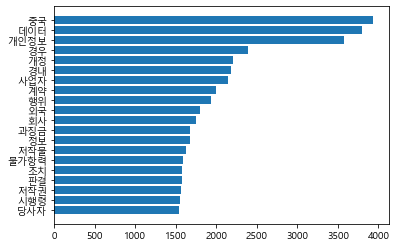

In [21]:
from matplotlib import font_manager, rc

# 그래프에서 사용할 한글 폰트를 지정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

## 단어별 중요도(TF-IDF) 출력
# plt.barh로 그래프 출력
n = list(TF_IDF_new.keys())[:20][::-1] # 빈도수 상위 20개의 단어를 추출해 역순으로 정렬
w = list(TF_IDF_new.values())[:20][::-1] # 20개 단어에 대한 빈도

plt.barh(range(20),w,tick_label=n) # 수평 막대그래프
plt.show()

In [22]:
# 단어별 중요도를 담을 딕셔너리 생성
tokens_const1 = list(TF_IDF_new.keys())
tokens_const_count1 = list(TF_IDF_new.values())

i_count = map(int, tokens_const_count1)
tokens_const_count1 = list(i_count)

token_word_count1 = dict(zip(tokens_const1, tokens_const_count1))

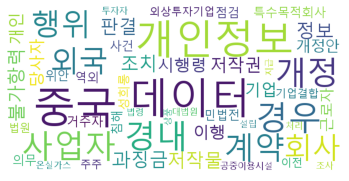

In [23]:
# WordCloud 객체에 전달할 폰트주소 생성
font_path = 'c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(
    font_path = font_path,
    max_font_size = 100, # 최대 폰트 크기
    width = 800, # 이미지 너비
    height = 400, # 이미지 높이
    background_color='white', # 이미지 배경색
    max_words=50) # 최대 단어 수

# 원문이 아닌 형태소 분석 결과로부터 워드 클라우드 생성
wordcloud.generate_from_frequencies(token_word_count1)
wordcloud.to_file('태평양.png') # 생성한 이미지를 파일로 저장
plt.axis("off")
plt.imshow(wordcloud)
plt.show()

### 단어 분포 탐색

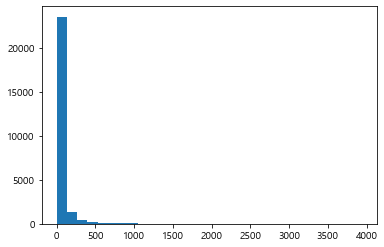

In [24]:
plt.hist(list(token_word_count1.values()), bins=30)
plt.show()